In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web
import datetime
import statsmodels.api as sm


#plots.py
# . . .
def plot_lines(df, linewidth = 1, figsize = (40,20),
               secondary_y = None, legend=True,
               h_zero = True, pp = None, 
               save_fig = False):
    
    fig, ax = plt.subplots(figsize = figsize)    
    # If no secondary_y (axis), plot all variables at once
    df.dropna().plot.line(linewidth = linewidth, ax = ax, secondary_y=secondary_y, legend = legend)
    # Turn the text on the x-axis so that it reads vertically
    ax.tick_params(axis='x', rotation=90)
    # Get rid of tick lines perpendicular to the axis for aesthetic
    ax.tick_params('both', length=0, which='both')
    # transform y-axis values from sci notation to integers
    vals = ax.get_yticks()
    ax.set_yticklabels([round(x,2) for x in vals]) 
    if h_zero: ax.axhline(0, ls="--", color = "k")
    
    # format image filename 
    remove_chars = "[]:$'\\"
    filename = str(list(df.keys()))
    for char in remove_chars:
        filename = filename.replace(char, "")  
    if save_fig:
        try:
            os.mkdir("plots")
        except:
            pass
        plt.savefig("plots/" + filename[:50] + " line.png", 
                bbox_inches = "tight")
    #[:50] + " line.png"
    # save image if PdfPages object was passed
    if pp != None: pp.savefig(fig, bbox_inches = "tight")

def plot_scatter(data, s = 75, figsize = (40, 20), save_fig = False, pp = None):
    # Create plot for every unique pair of variables
    df = data.copy()
    for var1 in df:
        for var2 in df:
            if var1 != var2:
                fig, ax = plt.subplots(figsize = figsize)
                # Create list of years from index
                # Year will be represented by color
                if "Year" not in df.keys():
                    df["Year"] = [int(str(ind)[:4]) for ind in df.index] 
                df.plot.scatter(x = var1, y = var2, s = s, ax = ax, 
                                c = "Year", cmap = "viridis")
                # Turn the text on the x-axis so that it reads vertically
                ax.tick_params(axis='x', rotation=90)
                # Get rid of tick lines perpendicular to the axis for aesthetic
                ax.tick_params('both', length=0, which='both')
                # save image if PdfPages object was passed
                if save_fig:
                    try:
                        os.mkdir("plots")
                    except:
                        pass
                    plt.savefig("plots/" + str(list(df.keys())).replace("[", "").replace("]","")[:40] + " scatter.png",
                            bbox_inches = "tight")
                    if pp != None: pp.savefig(fig, bbox_inches = "tight")

def corr_matrix_heatmap(df, save_fig = False, pp = None):  
    #Create a figure to visualize a corr matrix  
    fig, ax = plt.subplots(figsize=(20,20))  
    # use ax.imshow() to create a heatmap of correlation values  
    # seismic mapping shows negative values as blue and positive values as red  
    im = ax.imshow(df, norm = plt.cm.colors.Normalize(-1,1), cmap = "seismic")  
    # create a list of labels, stacking each word in a label by replacing " "  
    # with "\n"  
    labels = df.keys()  
    num_vars = len(labels)  
    tick_labels = [lab.replace(" ", "\n") for lab in labels]  
    # adjust font size according to the number of variables visualized  
    tick_font_size = 120 / num_vars  
    val_font_size = 200 / num_vars  
    plt.rcParams.update({'font.size': tick_font_size}) 
    # prepare space for label of each column  
    x_ticks = np.arange(num_vars)  
    # select labels and rotate them 90 degrees so that they are vertical  
    plt.xticks(x_ticks, tick_labels, fontsize = tick_font_size, rotation = 90)  
    # prepare space for label of each row  
    y_ticks = np.arange(len(labels))  
    # select labels  
    plt.yticks(y_ticks, tick_labels, fontsize = tick_font_size)  
    # show values in each tile of the heatmap  
    for i in range(len(labels)):  
        for j in range(len(labels)):  
            text = ax.text(i, j, str(round(df.values[i][j],2)),  
                           fontsize= val_font_size, ha="center",   
                           va="center", color = "w")  
    #Create title with Times New Roman Font  
    title_font = {"fontname":"Times New Roman"}  
    plt.title("Correlation", fontsize = 50, **title_font)  
    #Call scale to show value of colors 
    cbar = fig.colorbar(im)
    plt.show()
    if save_fig:
        try:
            os.mkdir("plots")
        except:
            pass
        plt.savefig("plots/" + str(list(df.keys())).replace("[", "").replace("]","")[:40] + " corrMatrix.png",
            bbox_inches = "tight")

        if pp != None: pp.savefig(fig, bbox_inches="tight")
    plt.close()

def plot_stacked_lines(df, plot_vars, linewidth = 1, 
                       figsize = (40, 20),
                       pp = None, total_var = False,
                      title = False):
    fig, ax = plt.subplots(figsize = figsize)
    # df.plot.area() created a stacked plot
    df[plot_vars].plot.area(stacked = True, linewidth = linewidth,
                            ax = ax)
    if total_var != False:
        df[total_var].plot.line(linewidth = linewidth, ax = ax,
                                c = "k",label = total_var, 
                                ls = "--")
    # place legend in top left corner of plot
    # format legend so that there are two columns of names
    ax.legend(loc = 2, ncol = 2)
    if title != False:
        plt.title(title)
        
def gather_data(data_codes, start, end = datetime.datetime.today(), freq = "A"):
    i = 0
    # dct.items() calls key and value that key points to
    for key, val in data_codes.items():
        if i == 0:
            # Create dataframe for first variable, then rename column
            df = web.DataReader(val, "fred", start, end).resample(freq).mean()
            df.rename(columns = {val:key}, inplace = True) 
            i = None
        else:
            # If dataframe already exists, add new column
            df[key] = web.DataReader(val, "fred", start, end).resample(freq).mean()
            
    return df

In [2]:
data_dict = {"Nominal GDP":"GDP",
             "Real GDP":"GDPC1",
#              "PPI: All Comodities": "PPIACO",
#              "PPI: Lumber and Wood Products":"WPU081",
#             "PPI: Copper and Copper Products":"WPUSI019011",
#             "PPI: Gas and Oil Extraction":"PCU21112111",
#             "Expected Inflation: 5 Year Breakeven Rate":"T5YIE",
            "$CPI_{Urban}$":"CPIAUCNS",
#              "1 Month UST": "DGS1MO",
#              "3 Month UST": "DGS3MO",
#              "1 Year UST": "DGS1",
#              "2 Year UST": "DGS2",
#              "5 Year UST": "DGS5",
             "10 Year UST Rate": "DGS10",            
             "Effective Federal Funds Rate": "DFF",
#              "5 Year TIPS":"DFII5",
#              "10 Year TIPS": "DFII10",            
#              "$CPI_{Core}$":"CPILFESL",
#             "Industrial Production Index":"INDPRO",
#             "$\pi_{e_{5Y}}$":"T5YIE",
#              "$\pi_{e_{10Y}}$":"T10YIE",
             "Currency in Circulation":"CURRCIR",
#              "M2":"WM2NS",
#             "Personal Savings Rate":"PSAVERT",
#             "Private Weekly Employee Earnings":"CES0500000011",
#             "Private Hourly Nonsupervisory Earnings":"AHETPI",
            "Unemployment Rate":"UNRATE"}
freq = "Q"
start = datetime.datetime(1964, 1, 1)
# end = datetime.datetime(1985, 12, 31)
end =datetime.datetime.today()

df = gather_data(data_dict, start, 
          end = end, freq = freq)
# df["Nominal GDP"] = df["Nominal GDP"].mul(1000)
# df["Real GDP"] = df["Real GDP"].mul(1000)

### We will adjust between using annual vs. quarterly lags and rates 

In [3]:
df["$V_C$"] = df["Nominal GDP"].div(df["Currency in Circulation"])
# df["Real 10 Year UST"] = df["10 Year UST Rate"].sub(df["$CPI_{Urban}$"].diff().mul(100))
lag_length = 4
num_lags = 4
for key, val in df.items():
    for i in range(1, num_lags + 1):
        df[key + " Lag" + str(i)] = val.shift(lag_length * i) 
df.dropna()

,Nominal GDP,Real GDP,$CPI_{Urban}$,10 Year UST Rate,Effective Federal Funds Rate,Currency in Circulation,Unemployment Rate,$V_C$,Nominal GDP Lag1,Nominal GDP Lag2,...,Currency in Circulation Lag3,Currency in Circulation Lag4,Unemployment Rate Lag1,Unemployment Rate Lag2,Unemployment Rate Lag3,Unemployment Rate Lag4,$V_C$ Lag1,$V_C$ Lag2,$V_C$ Lag3,$V_C$ Lag4
DATE,,,,,,,,,,,,,,,,,,,,,
1968-03-31,909.387,4713.013,34.200000,5.610968,4.792637,46.135667,3.733333,19.711149,844.170,795.734,...,38.817000,36.617333,3.833333,3.866667,4.900000,5.466667,19.304286,19.217069,18.491640,18.292484
1968-06-30,934.344,4791.758,34.533333,5.746129,5.984286,46.989000,3.566667,19.884313,848.983,804.981,...,39.156667,37.167000,3.833333,3.833333,4.666667,5.200000,19.233579,19.198669,18.647936,18.260123
1968-09-30,950.825,4828.892,35.000000,5.458594,5.946522,48.244000,3.533333,19.708668,865.233,819.638,...,40.143667,38.059333,3.800000,3.766667,4.366667,5.000000,19.199667,19.107414,18.666033,18.182951
1968-12-31,968.030,4847.885,35.400000,5.767742,5.918152,49.547667,3.400000,19.537348,881.439,833.302,...,41.418667,38.983000,3.900000,3.700000,4.100000,4.966667,19.121120,19.027042,18.635486,17.887772
1969-03-31,993.337,4923.760,35.833333,6.170984,6.567444,49.483000,3.400000,20.074308,909.387,844.170,...,41.407667,38.817000,3.733333,3.833333,3.866667,4.900000,19.711149,19.304286,19.217069,18.491640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-30,22740.959,19368.310,269.315000,1.590781,0.068242,2167.198667,5.900000,10.493251,19477.444,21289.268,...,1650.700667,1547.615000,12.966667,3.600000,3.933333,4.366667,10.122572,12.290786,12.414420,12.485612
2021-09-30,23202.344,19478.893,273.626667,1.324844,0.090000,2189.512000,5.100000,10.597039,21138.574,21505.012,...,1675.393333,1568.725000,8.833333,3.633333,3.766667,4.333333,10.553390,12.268306,12.330897,12.467891
2021-12-31,24002.815,19806.290,277.779667,1.533387,0.079457,2212.588333,4.233333,10.848297,21477.597,21694.458,...,1699.542000,1593.313000,6.766667,3.600000,3.833333,4.166667,10.449080,12.166604,12.246432,12.479008


In [4]:
log_df = np.log(df)
log_diff_df = log_df.diff(lag_length)
for key, val in df.items():
    if "Rate" in key:
        log_df[key] = val
        log_diff_df[key] = val
log_df.dropna()

,Nominal GDP,Real GDP,$CPI_{Urban}$,10 Year UST Rate,Effective Federal Funds Rate,Currency in Circulation,Unemployment Rate,$V_C$,Nominal GDP Lag1,Nominal GDP Lag2,...,Currency in Circulation Lag3,Currency in Circulation Lag4,Unemployment Rate Lag1,Unemployment Rate Lag2,Unemployment Rate Lag3,Unemployment Rate Lag4,$V_C$ Lag1,$V_C$ Lag2,$V_C$ Lag3,$V_C$ Lag4
DATE,,,,,,,,,,,,,,,,,,,,,
1968-03-31,6.812771,8.458083,3.532226,5.610968,4.792637,3.831586,3.733333,2.981184,6.738354,6.679265,...,3.658858,3.600522,3.833333,3.866667,4.900000,5.466667,2.960327,2.955799,2.917319,2.906490
1968-06-30,6.839845,8.474653,3.541925,5.746129,5.984286,3.849914,3.566667,2.989931,6.744039,6.690819,...,3.667571,3.615421,3.833333,3.833333,4.666667,5.200000,2.956658,2.954841,2.925735,2.904720
1968-09-30,6.857330,8.482372,3.555348,5.458594,5.946522,3.876271,3.533333,2.981059,6.762999,6.708863,...,3.692465,3.639146,3.800000,3.766667,4.366667,5.000000,2.954893,2.950076,2.926705,2.900484
1968-12-31,6.875263,8.486298,3.566712,5.767742,5.918152,3.902935,3.400000,2.972328,6.781556,6.725396,...,3.723732,3.663126,3.900000,3.700000,4.100000,4.966667,2.950793,2.945861,2.925068,2.884117
1969-03-31,6.901070,8.501828,3.578879,6.170984,6.567444,3.901629,3.400000,2.999441,6.812771,6.738354,...,3.723466,3.658858,3.733333,3.833333,3.866667,4.900000,2.981184,2.960327,2.955799,2.917319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-30,10.031923,9.871394,5.595882,1.590781,0.068242,7.681191,5.900000,2.350732,9.877012,9.965958,...,7.408955,7.344470,12.966667,3.600000,3.933333,4.366667,2.314768,2.508850,2.518859,2.524577
2021-09-30,10.052009,9.877087,5.611765,1.324844,0.090000,7.691434,5.100000,2.360575,9.958855,9.976041,...,7.423803,7.358018,8.833333,3.633333,3.766667,4.333333,2.356447,2.507019,2.512108,2.523157
2021-12-31,10.085926,9.893755,5.626828,1.533387,0.079457,7.701918,4.233333,2.384008,9.974766,9.984812,...,7.438114,7.373571,6.766667,3.600000,3.833333,4.166667,2.346514,2.498695,2.505235,2.524048


In [5]:
log_diff_df.dropna()

,Nominal GDP,Real GDP,$CPI_{Urban}$,10 Year UST Rate,Effective Federal Funds Rate,Currency in Circulation,Unemployment Rate,$V_C$,Nominal GDP Lag1,Nominal GDP Lag2,...,Currency in Circulation Lag3,Currency in Circulation Lag4,Unemployment Rate Lag1,Unemployment Rate Lag2,Unemployment Rate Lag3,Unemployment Rate Lag4,$V_C$ Lag1,$V_C$ Lag2,$V_C$ Lag3,$V_C$ Lag4
DATE,,,,,,,,,,,,,,,,,,,,,
1969-03-31,0.088299,0.043745,0.046653,6.170984,6.567444,0.070043,3.400000,0.018256,0.074417,0.059089,...,0.064608,0.058337,3.733333,3.833333,3.866667,4.900000,0.020857,0.004528,0.038480,0.010828
1969-06-30,0.076890,0.030210,0.053559,6.356984,8.332527,0.064394,3.433333,0.012497,0.095806,0.053220,...,0.068407,0.052149,3.566667,3.833333,3.833333,4.666667,0.033273,0.001817,0.029106,0.021016
1969-09-30,0.079941,0.029074,0.054669,6.856825,8.981087,0.062192,3.566667,0.017749,0.094331,0.054136,...,0.066322,0.053318,3.533333,3.800000,3.766667,4.366667,0.026166,0.004817,0.023371,0.026221
1969-12-31,0.069930,0.020260,0.057629,7.310492,8.941630,0.059413,3.566667,0.010516,0.093707,0.056160,...,0.055803,0.060606,3.400000,3.900000,3.700000,4.100000,0.021534,0.004932,0.020794,0.040950
1970-03-31,0.056618,0.003244,0.058708,7.375167,8.558889,0.057659,4.166667,-0.001041,0.088299,0.074417,...,0.054561,0.064608,3.400000,3.733333,3.833333,3.866667,0.018256,0.020857,0.004528,0.038480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-30,0.154911,0.115351,0.047351,1.590781,0.068242,0.118946,5.900000,0.035965,-0.088946,0.038145,...,0.064485,0.064429,12.966667,3.600000,3.933333,4.366667,-0.194082,-0.010009,-0.005718,-0.026923
2021-09-30,0.093154,0.048281,0.051982,1.324844,0.090000,0.089026,5.100000,0.004127,-0.017187,0.040130,...,0.065785,0.067665,8.833333,3.633333,3.766667,4.333333,-0.150572,-0.005089,-0.011049,-0.026795
2021-12-31,0.111161,0.053858,0.064749,1.533387,0.079457,0.073667,4.233333,0.037494,-0.010046,0.041463,...,0.064543,0.068448,6.766667,3.600000,3.833333,4.166667,-0.152181,-0.006540,-0.018813,-0.021341


<AxesSubplot:xlabel='$V_C$', ylabel='10 Year UST Rate'>

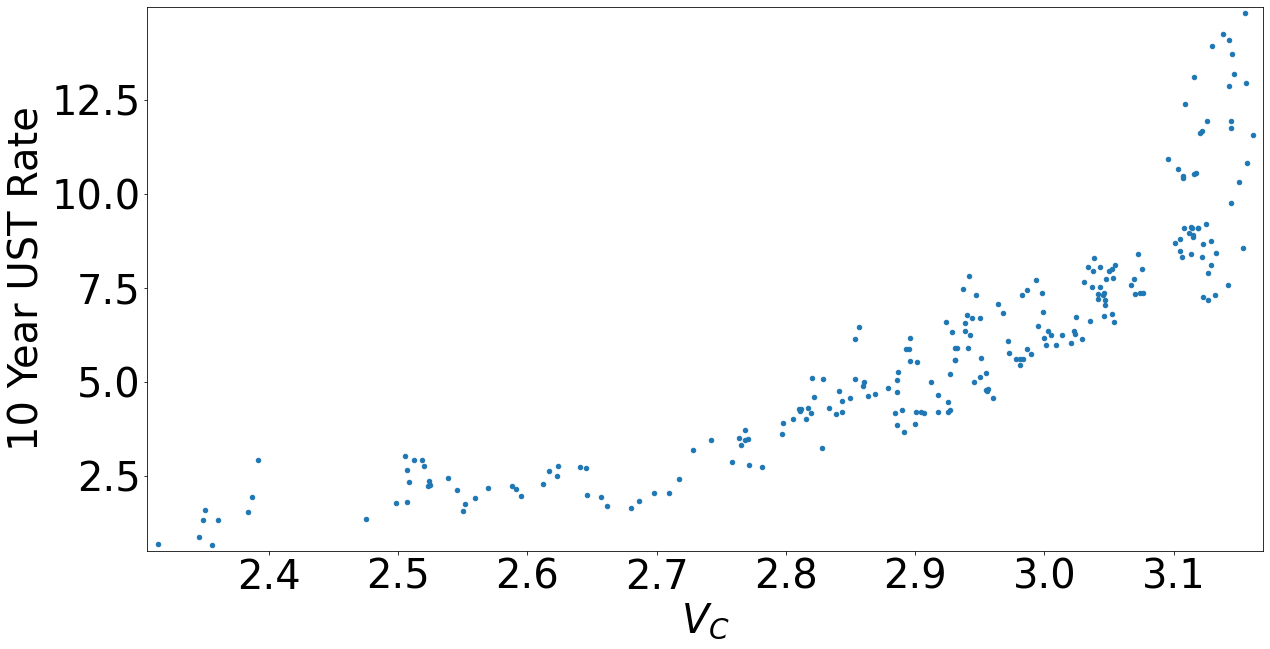

In [6]:
plt.rcParams["figure.figsize"] = (20, 10)  #set default figure size
plt.rcParams['axes.xmargin'] = .01
plt.rcParams['axes.ymargin'] = .01
plt.rcParams["font.size"] = 40
fig, ax = plt.subplots()
log_df.plot.scatter(x = "$V_C$", y = "10 Year UST Rate", ax = ax)

<AxesSubplot:xlabel='Nominal GDP', ylabel='10 Year UST Rate'>

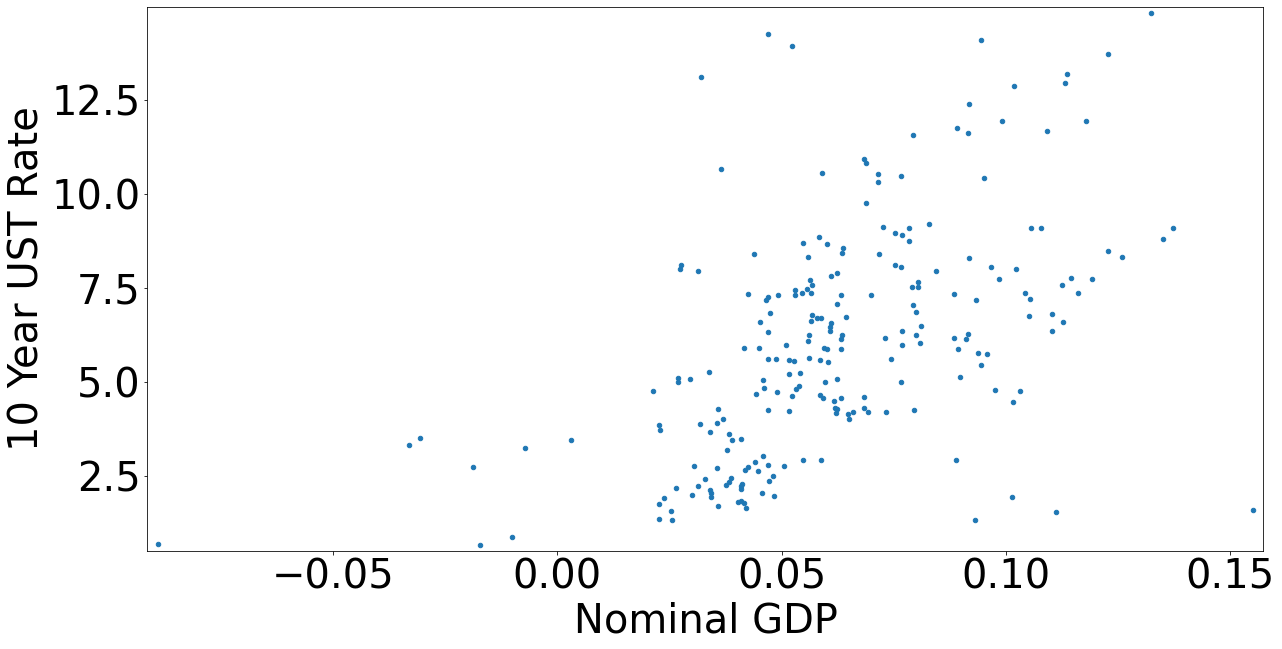

In [7]:
fig, ax = plt.subplots()
log_diff_df.plot.scatter(x = "Nominal GDP", y = "10 Year UST Rate", ax = ax)


C:\Users\JLCat\AppData\Local\Temp\ipykernel_532\985817636.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation = 90)
C:\Users\JLCat\AppData\Local\Temp\ipykernel_532\985817636.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(y,1) for y in ax.get_yticks()], color = "C0")
C:\Users\JLCat\AppData\Local\Temp\ipykernel_532\985817636.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels([round(y,1) for y in ax2.get_yticks()], color = "C1")


Text(2000-04-01, 8.5, '$C_{Circ}$')

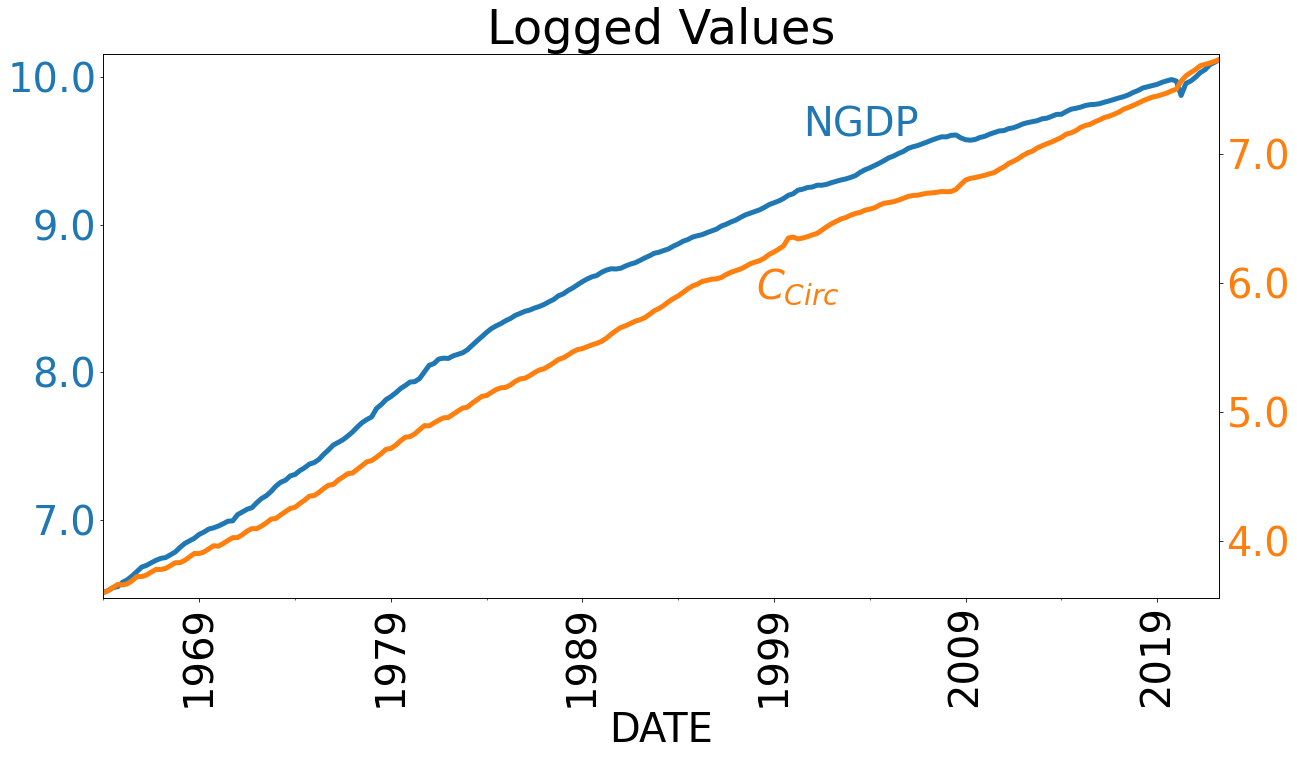

In [8]:
plot_vars = ["Nominal GDP",
            "Currency in Circulation"]
plot_df = np.log(df[plot_vars])
fig, ax = plt.subplots(figsize = (20,10))

plot_df[[plot_vars[0]]].plot.line(ax = ax,
                                    legend = False,
                                 linewidth = 5)
ax.set_xticklabels(ax.get_xticks(), rotation = 90)
ax.set_title("Logged Values")
ax2 = ax.twinx()
plot_df[[plot_vars[1]]].plot.line(ax = ax2,
                                  legend = False,
                                  color = "C1",
                                 linewidth = 5)
ax.set_yticklabels([round(y,1) for y in ax.get_yticks()], color = "C0")
ax2.set_yticklabels([round(y,1) for y in ax2.get_yticks()], color = "C1")

ax.text("2000-08-01", 9.6, "NGDP", color = "C0")
ax.text("2000-04-01", 8.5, "$C_{Circ}$",ha = "center", color = "C1")

C:\Users\JLCat\AppData\Local\Temp\ipykernel_532\652272663.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df["$V_C$"] = plot_df["Nominal GDP"].div(plot_df["Currency in Circulation"])
C:\Users\JLCat\AppData\Local\Temp\ipykernel_532\652272663.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df[plot_vars[2]] = df[plot_vars[2]]
C:\Users\JLCat\AppData\Local\Temp\ipykernel_532\652272663.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the cavea

Text(2009-01-01, 6.1, '$V_C$')

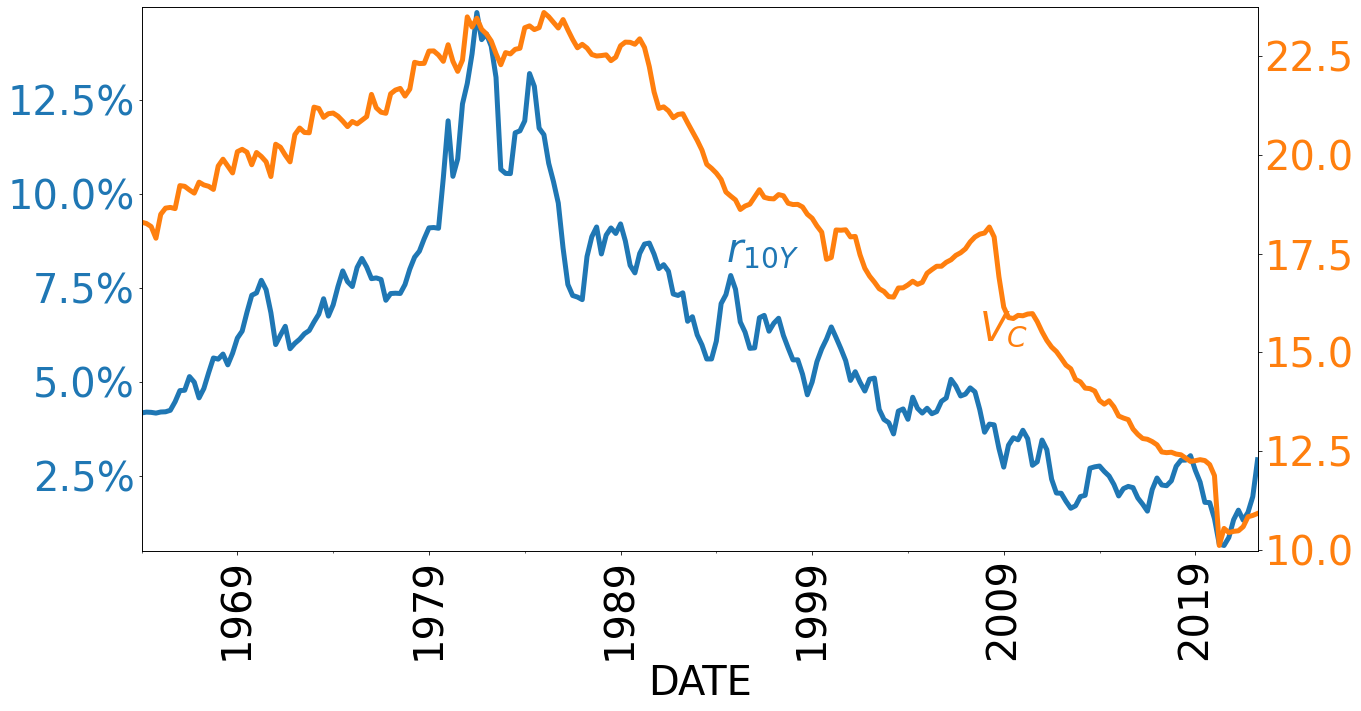

In [9]:
plot_vars = ["Nominal GDP",
            "Currency in Circulation",
            "10 Year UST Rate"]
plot_df = df[plot_vars]
plot_df["$V_C$"] = plot_df["Nominal GDP"].div(plot_df["Currency in Circulation"])
plot_df[plot_vars[2]] = df[plot_vars[2]]
plot_df.dropna(inplace = True)        
plot_vars.append("$V_C$")
plot_vars = plot_vars[2:]
                           
fig, ax = plt.subplots(figsize = (20,10))
plot_df[[plot_vars[0]]].plot.line(ax = ax,
                                    legend = False,
                                 linewidth = 5)
ax.set_xticklabels(ax.get_xticks(), rotation = 90)
ax2 = ax.twinx()
plot_df[[plot_vars[1]]].plot.line(ax = ax2,
                                  legend = False,
                                  color = "C1",
                                 linewidth = 5)
ax.set_yticklabels([str(round(y,1)) + "%" for y in ax.get_yticks()], color = "C0")
ax2.set_yticklabels([round(y,1) for y in ax2.get_yticks()], color = "C1")
ax.text("1994-08-01", 8.2, "$r_{10Y}$", color = "C0")
ax.text("2009-01-01", 6.1, plot_vars[1],ha = "center", color = "C1")

C:\Users\JLCat\AppData\Local\Temp\ipykernel_532\1036862842.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation = 90)
C:\Users\JLCat\AppData\Local\Temp\ipykernel_532\1036862842.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(round(y,1)) + "%" for y in ax.get_yticks()], color = "C0")
C:\Users\JLCat\AppData\Local\Temp\ipykernel_532\1036862842.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels([round(y,1) for y in ax2.get_yticks()], color = "C1")


Text(2009-01-01, 6.1, '$V_C$')

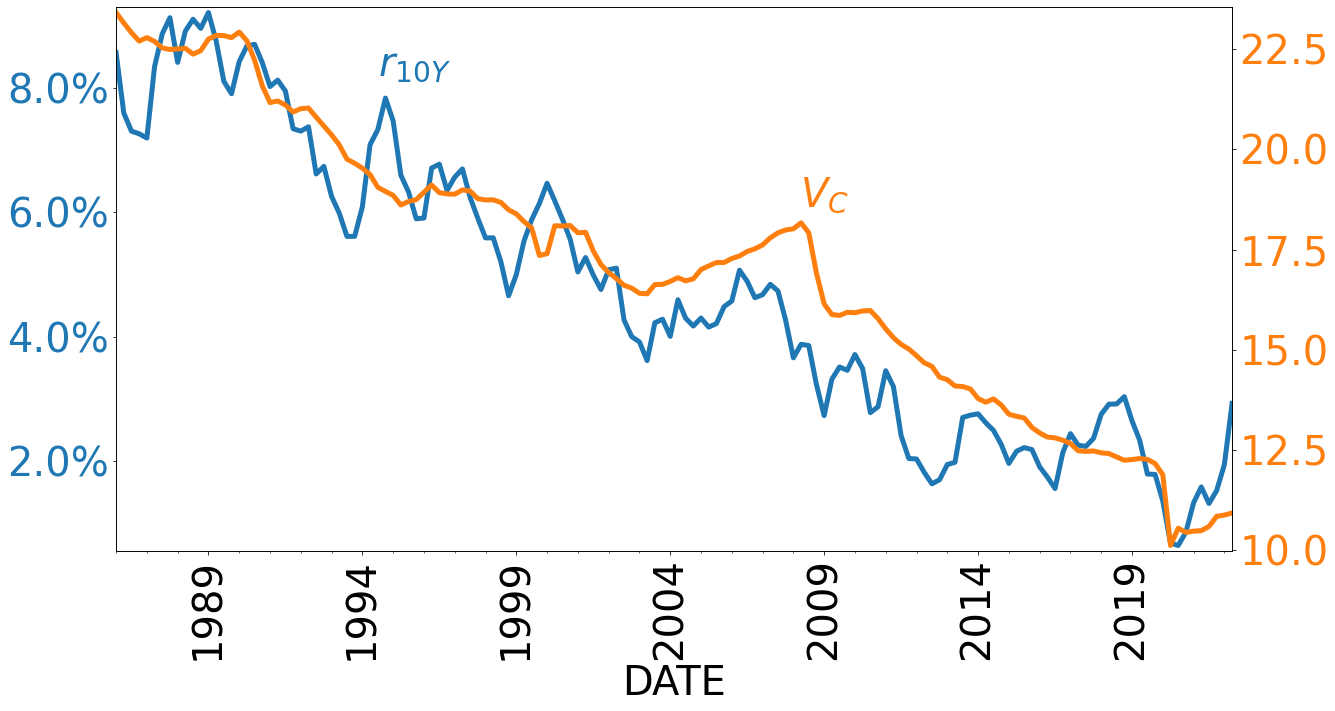

In [10]:
plot_df = plot_df.loc["1986":]                          
fig, ax = plt.subplots(figsize = (20,10))
plot_df[[plot_vars[0]]].plot.line(ax = ax,
                                    legend = False,
                                 linewidth = 5)
ax.set_xticklabels(ax.get_xticks(), rotation = 90)
ax2 = ax.twinx()
plot_df[[plot_vars[1]]].plot.line(ax = ax2,
                                  legend = False,
                                  color = "C1",
                                 linewidth = 5)
ax.set_yticklabels([str(round(y,1)) + "%" for y in ax.get_yticks()], color = "C0")
ax2.set_yticklabels([round(y,1) for y in ax2.get_yticks()], color = "C1")
ax.text("1994-08-01", 8.2, "$r_{10Y}$", color = "C0")
ax.text("2009-01-01", 6.1, plot_vars[1],ha = "center", color = "C1")

#### In our regressions, we will add a lag for currency in circulation. The reason for this is that monetary expansion often takes time to be effective.  A single lag is intended to account for this

In [11]:
x_names = ["10 Year UST Rate", "Currency in Circulation", "Currency in Circulation Lag1"]
y_name = ["Nominal GDP"]
names = y_name + x_names
data = log_df.dropna()[y_name + x_names]

y = data[y_name]
X = data[x_names]
# add column of 1s to data that will be used to estimate intercept
X["Intercept"] = 1
reg = sm.OLS(y ,X)
results = reg.fit(cov_type="HAC", cov_kwds={"maxlags":4})
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Nominal GDP   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     2243.
Date:                Wed, 24 Aug 2022   Prob (F-statistic):          2.30e-161
Time:                        22:04:23   Log-Likelihood:                 239.62
No. Observations:                 218   AIC:                            -471.2
Df Residuals:                     214   BIC:                            -457.7
Df Model:                           3                                         
Covariance Type:                  HAC                                         
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
10 Year UST Rate                 0.0412      0.007      6.230      0.000       0.028       0.054
Currency in Circulation         -0.3271      0.486     -0.672      0.501      -1.281       0.626
Currency in Circulation Lag1     1.2454      0.482      2.583      0.010       0.300       2.190
Intercept                        3.2160      0.129     24.861      0.000       2.962       3.470
==============================================================================
Omnibus:                       12.742   Durbin-Watson:                   0.078
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.726
Skew:                          -0.595   Prob(JB):                      0.00105
Kurtosis:                       2.691   Cond. No.                         690.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity and autocorrelation robust (HAC) using 4 lags and without small sample correction
"""

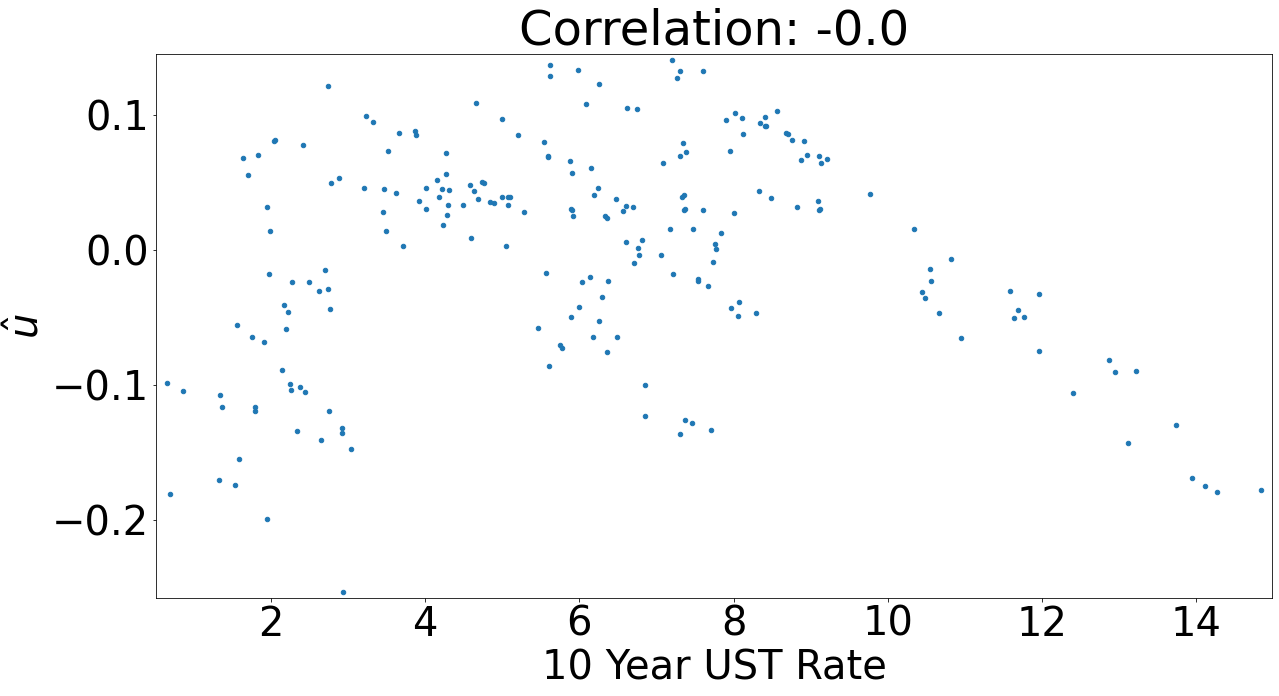

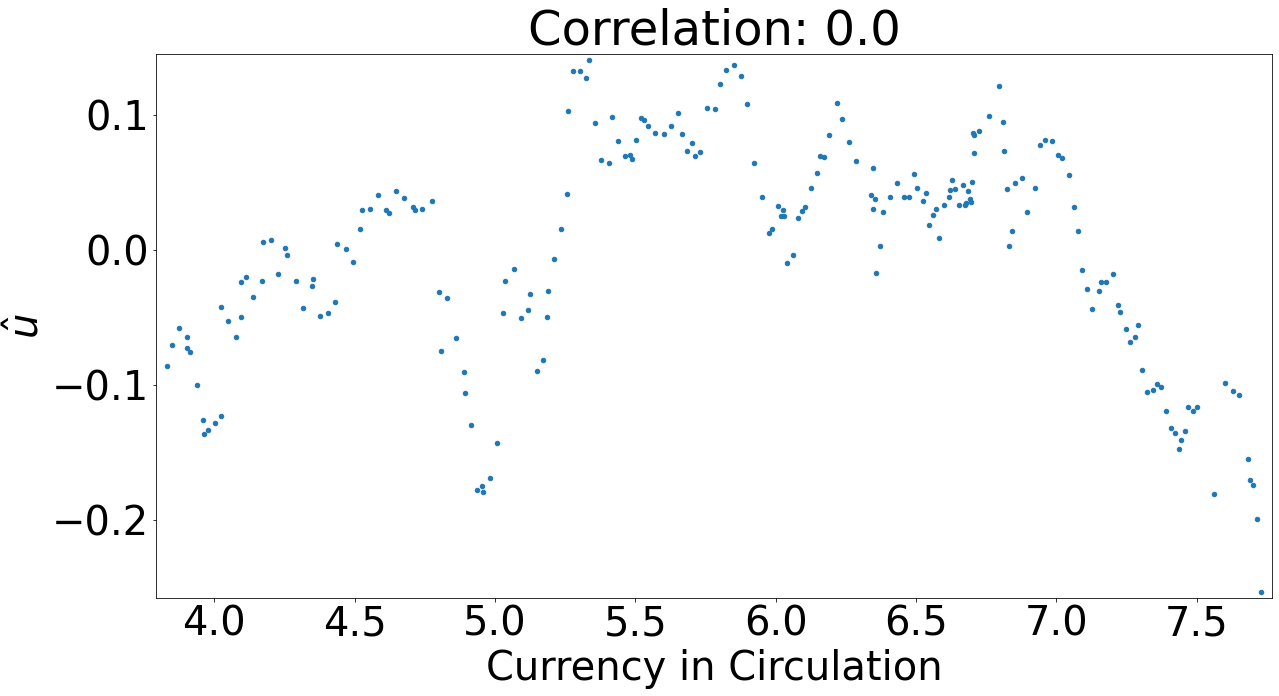

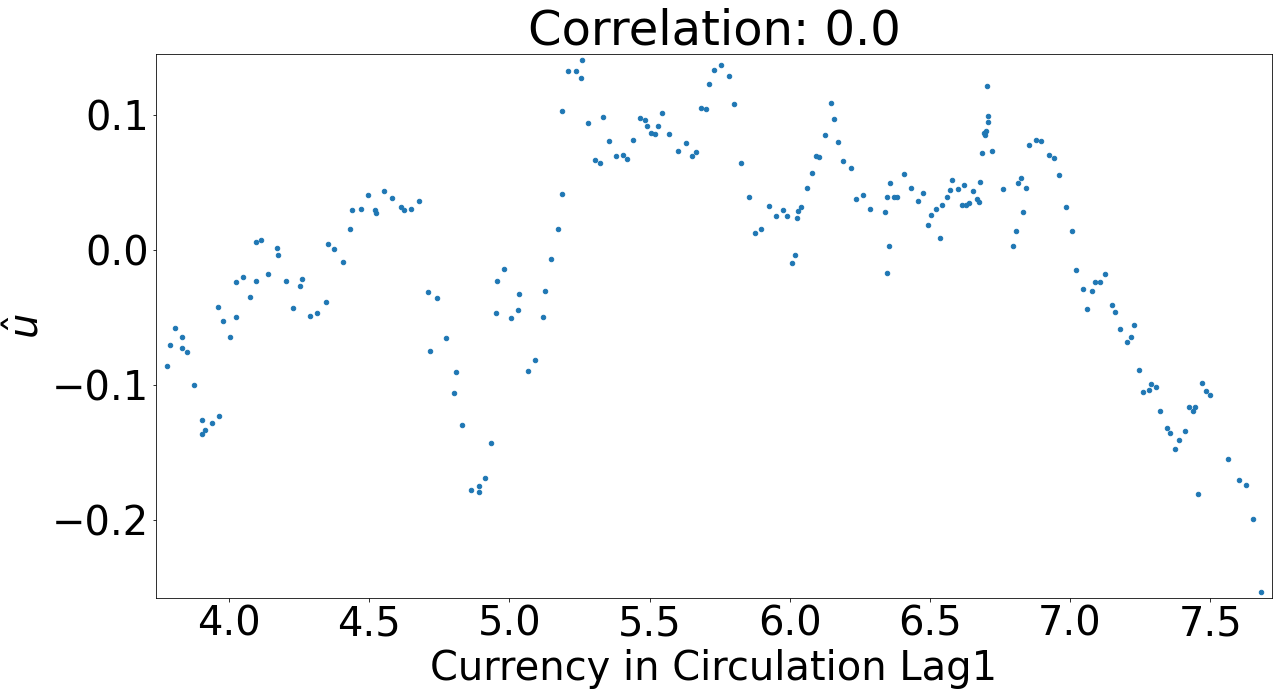

In [12]:
from supplementaryFunctions import *
build_estimator(data, results, y_name[0])
plot_errors(data)

In [13]:
import statsmodels.api as sm
x_names = ["Nominal GDP Lag1"]
y_name = ["Nominal GDP"]
names = y_name + x_names
data = log_df.dropna()[y_name + x_names]
y = data[y_name]
X = data[x_names]
# add column of 1s to data that will be used to estimate intercept
reg = sm.OLS(y ,X)
results = reg.fit(cov_type="HAC", cov_kwds={"maxlags":4})
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            Nominal GDP   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          3.246e+06
Date:                Wed, 24 Aug 2022   Prob (F-statistic):                        0.00
Time:                        22:04:23   Log-Likelihood:                          412.06
No. Observations:                 218   AIC:                                     -822.1
Df Residuals:                     217   BIC:                                     -818.7
Df Model:                           1                                                  
Covariance Type:                  HAC                                                  
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Nominal GDP Lag1     1.0067      0.001   1801.727      0.000       1.006       1.008
==============================================================================
Omnibus:                        9.307   Durbin-Watson:                   0.219
Prob(Omnibus):                  0.010   Jarque-Bera (JB):               14.627
Skew:                          -0.228   Prob(JB):                     0.000666
Kurtosis:                       4.184   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors are heteroscedasticity and autocorrelation robust (HAC) using 4 lags and without small sample correction
"""

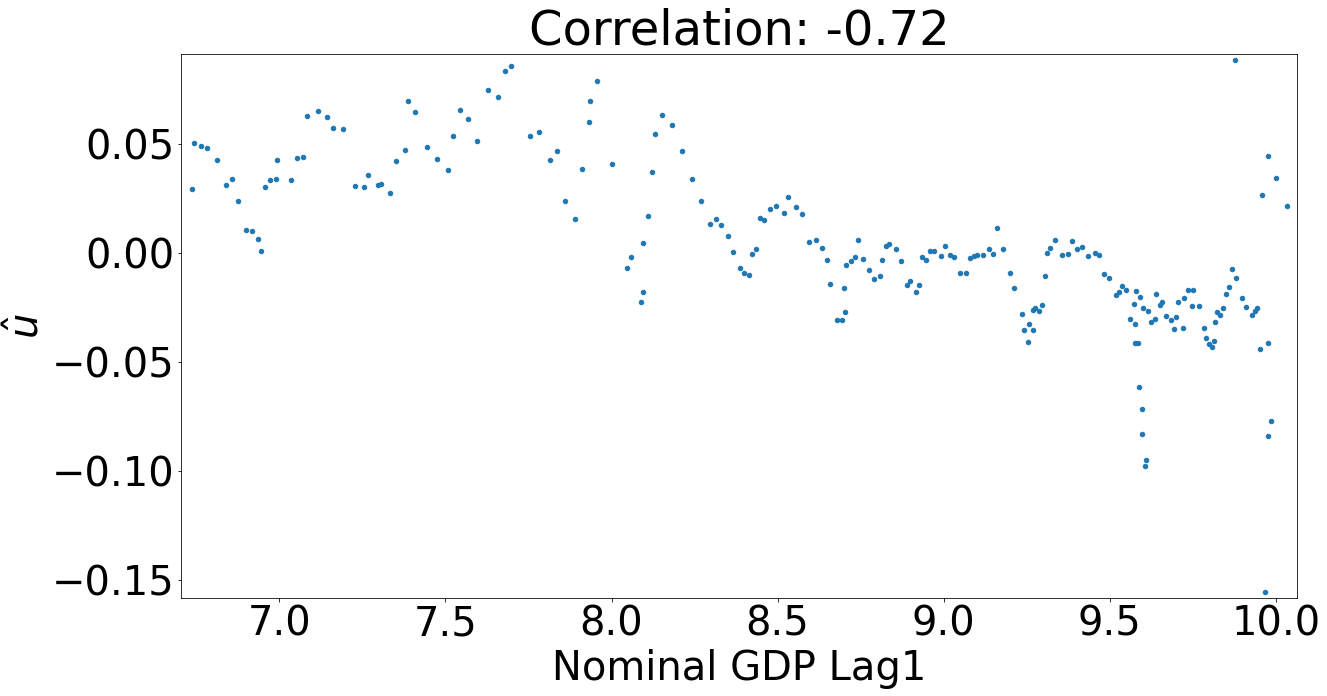

In [14]:
from supplementaryFunctions import *
build_estimator(data, results, y_name[0])
plot_errors(data)

#### The multicolinearity is likely due to the inclusion of currency in circulation, which, as expected, is highly correlated with the level of nominal GDP. 

#### Durbin-Watson Statistic is _very_ different from two. Let's difference the data. Let's start by adding add a lag as a novice means of checking for a unit root.

#### Since we have moved to using rates, let's estimate the rate of growth of nominal GDP withoutincluding a constant.

# The problem with the Durbin-Watson statistic has been fixed, however Nominal GDP Lag pretty much explains the level. Not surprising. We will explain this in more detail when we approach the random walk hypothesis.

In [17]:
x_names = ["10 Year UST Rate","10 Year UST Rate Lag1", "Currency in Circulation", "Currency in Circulation Lag1"]
y_name = ["Nominal GDP"]
data = log_diff_df.dropna()[y_name + x_names]
y = data[y_name]
X = data[x_names]
# add column of 1s to data that will be used to estimate intercept
X["Intercept"] = 1
reg = sm.OLS(y ,X)
results = reg.fit(cov_type="HAC", cov_kwds={"maxlags":4})
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Nominal GDP   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                     16.62
Date:                Wed, 24 Aug 2022   Prob (F-statistic):           7.66e-12
Time:                        22:04:39   Log-Likelihood:                 506.09
No. Observations:                 214   AIC:                            -1002.
Df Residuals:                     209   BIC:                            -985.4
Df Model:                           4                                         
Covariance Type:                  HAC                                         
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
10 Year UST Rate                 0.0109      0.002      5.783      0.000       0.007       0.015
10 Year UST Rate Lag1           -0.0068      0.002     -3.880      0.000      -0.010      -0.003
Currency in Circulation         -0.0173      0.123     -0.141      0.888      -0.258       0.223
Currency in Circulation Lag1     0.5065      0.137      3.706      0.000       0.239       0.774
Intercept                        0.0007      0.011      0.063      0.950      -0.021       0.023
==============================================================================
Omnibus:                       17.442   Durbin-Watson:                   0.493
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.613
Skew:                          -0.207   Prob(JB):                     1.02e-11
Kurtosis:                       5.346   Cond. No.                         482.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity and autocorrelation robust (HAC) using 4 lags and without small sample correction
"""

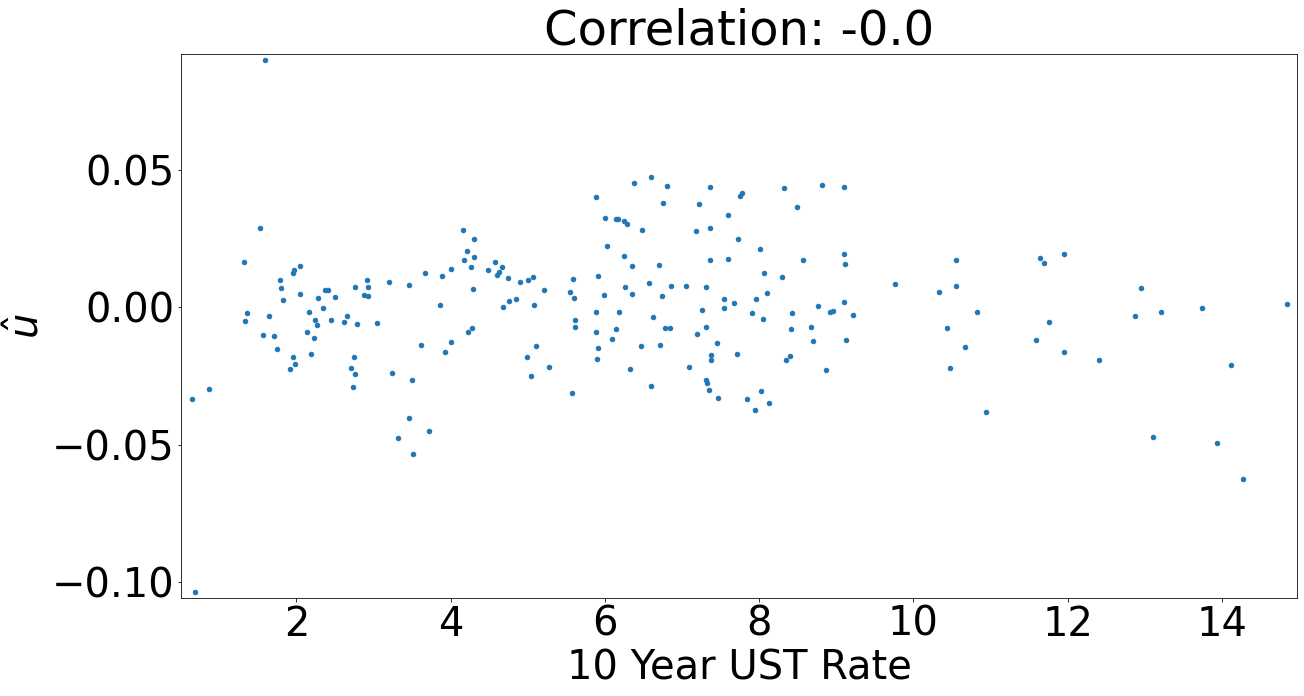

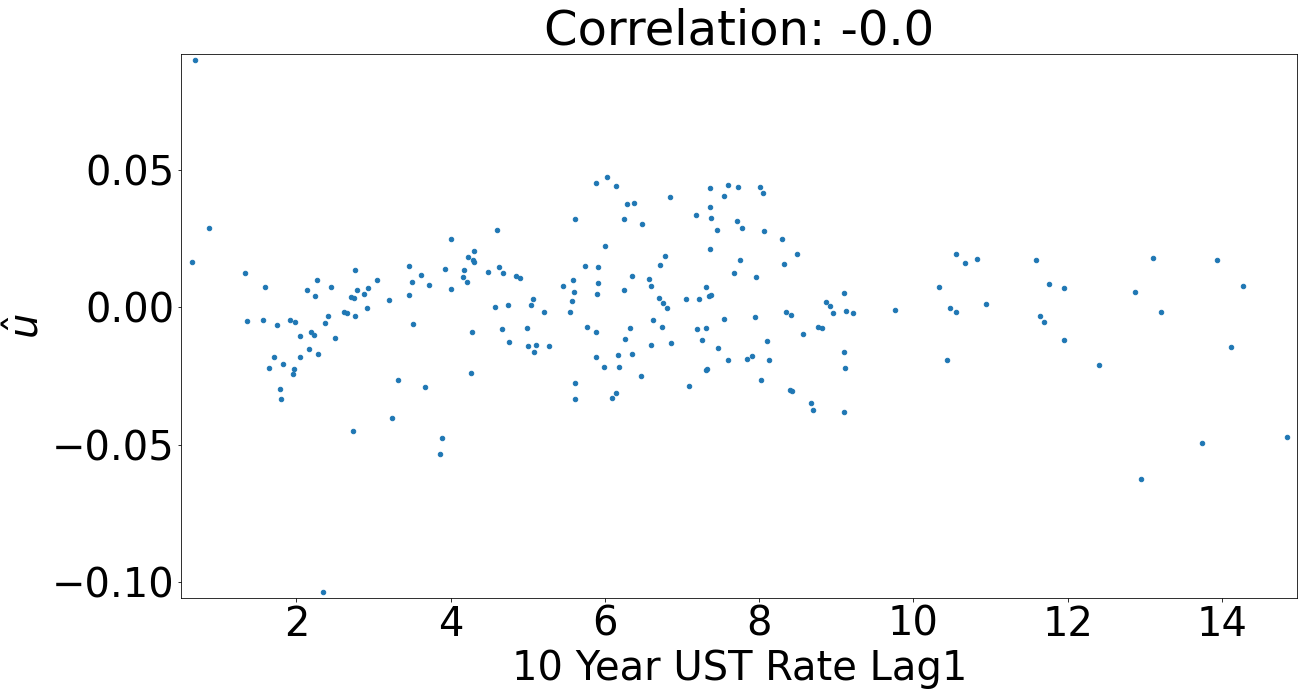

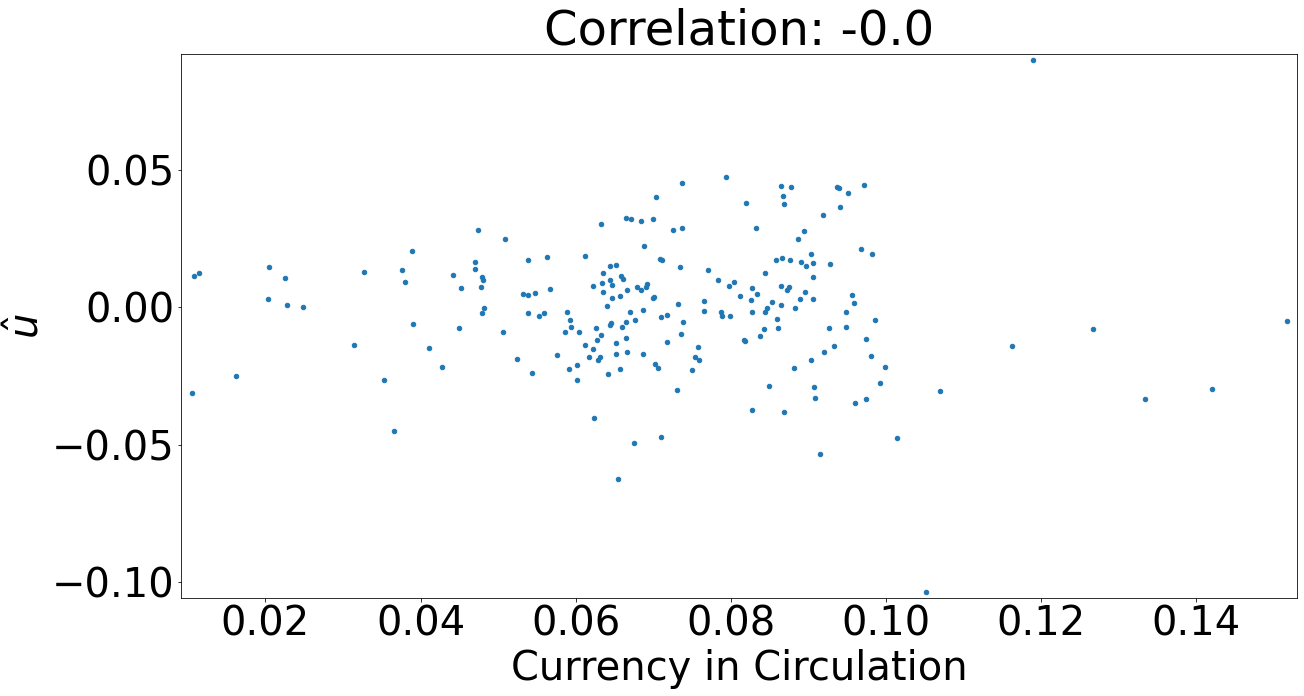

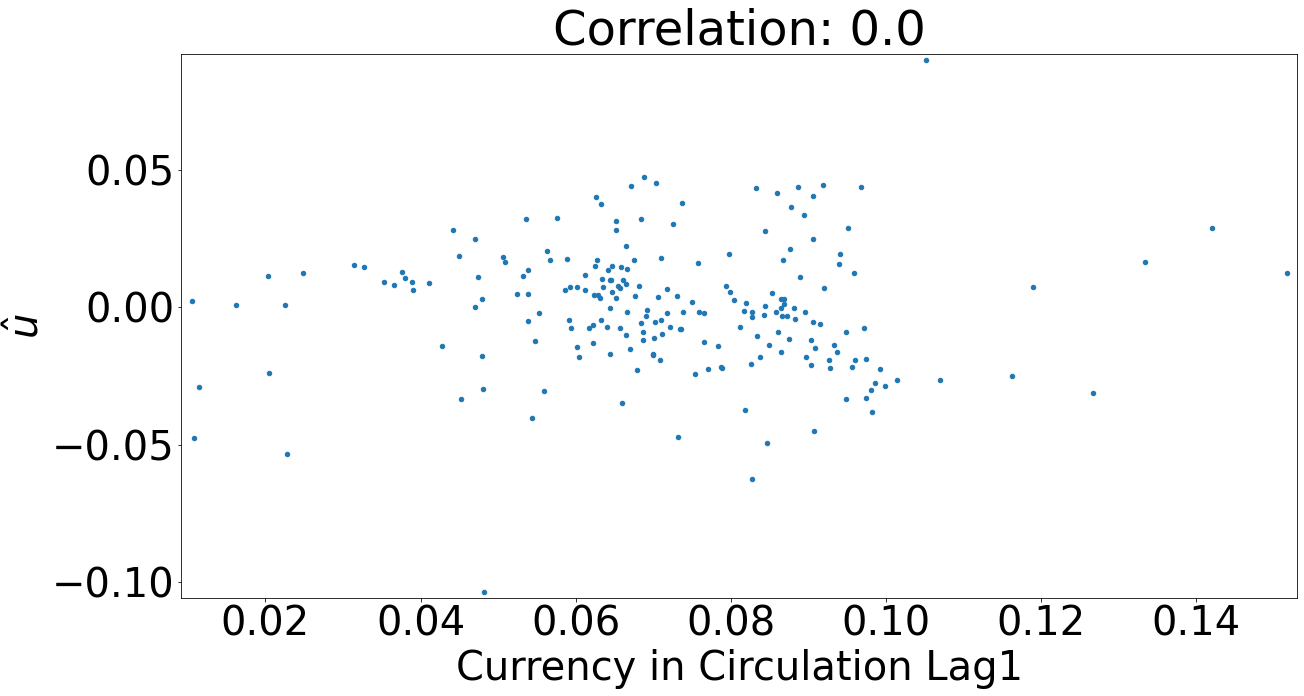

In [18]:
from supplementaryFunctions import *
build_estimator(data, results, y_name[0])
plot_errors(data)

In [19]:
#### x_names = ["10 Year UST Rate", "Currency in Circulation", "Currency in Circulation Lag1"]
y_name = ["Nominal GDP"]
data = log_diff_df.dropna()[y_name + x_names]
y = data[y_name]
X = data[x_names]
# add column of 1s to data that will be used to estimate intercept
# X["Intercept"] = 1
reg = sm.OLS(y ,X)
results = reg.fit(cov_type="HAC", cov_kwds={"maxlags": 1})
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            Nominal GDP   R-squared (uncentered):                   0.890
Model:                            OLS   Adj. R-squared (uncentered):              0.888
Method:                 Least Squares   F-statistic:                              229.8
Date:                Wed, 24 Aug 2022   Prob (F-statistic):                    1.69e-75
Time:                        22:04:39   Log-Likelihood:                          506.09
No. Observations:                 214   AIC:                                     -1004.
Df Residuals:                     210   BIC:                                     -990.7
Df Model:                           4                                                  
Covariance Type:                  HAC                                                  
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
10 Year UST Rate                 0.0109      0.002      6.444      0.000       0.008       0.014
10 Year UST Rate Lag1           -0.0067      0.002     -4.377      0.000      -0.010      -0.004
Currency in Circulation         -0.0131      0.101     -0.130      0.897      -0.211       0.185
Currency in Circulation Lag1     0.5108      0.084      6.059      0.000       0.346       0.676
==============================================================================
Omnibus:                       17.452   Durbin-Watson:                   0.493
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.144
Skew:                          -0.214   Prob(JB):                     1.29e-11
Kurtosis:                       5.332   Cond. No.                         478.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors are heteroscedasticity and autocorrelation robust (HAC) using 1 lags and without small sample correction
"""

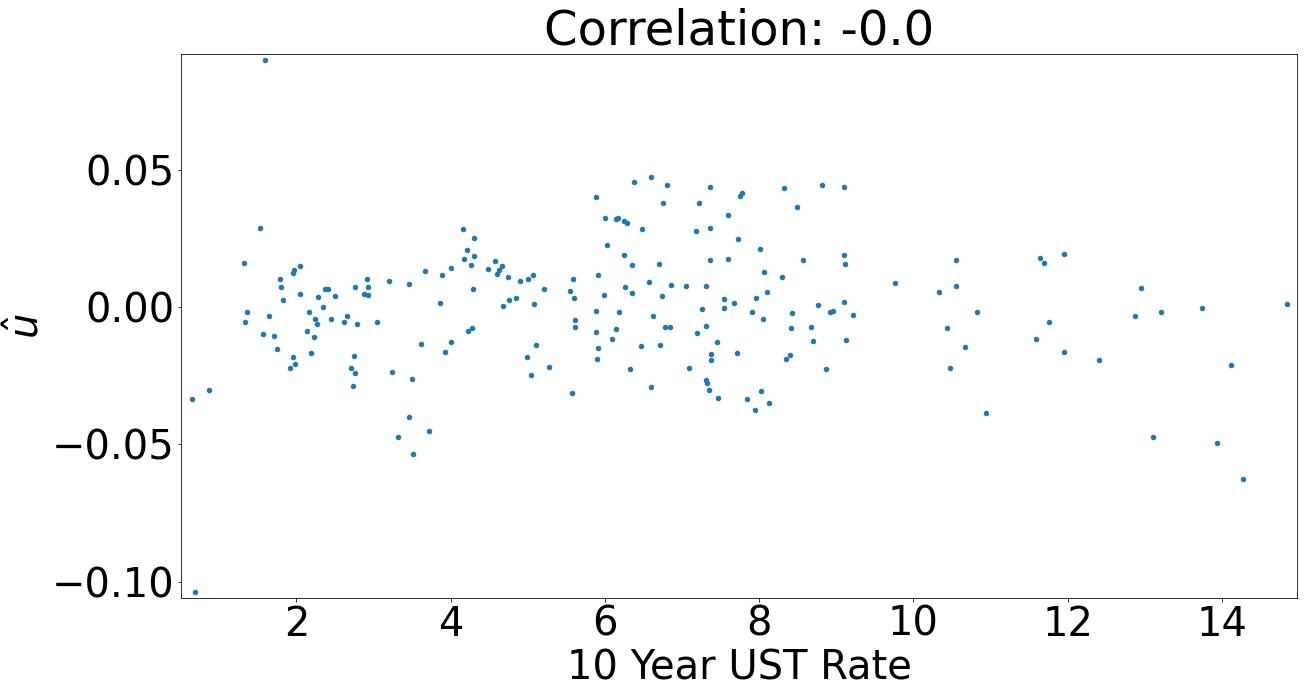

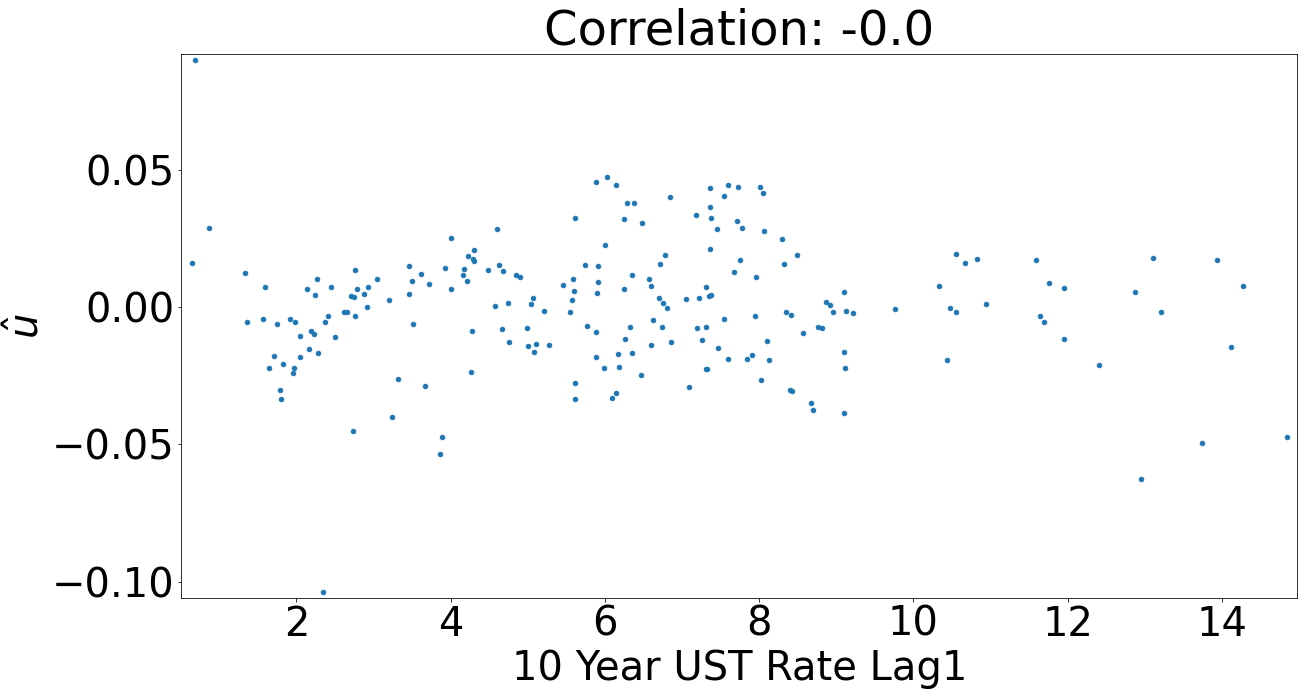

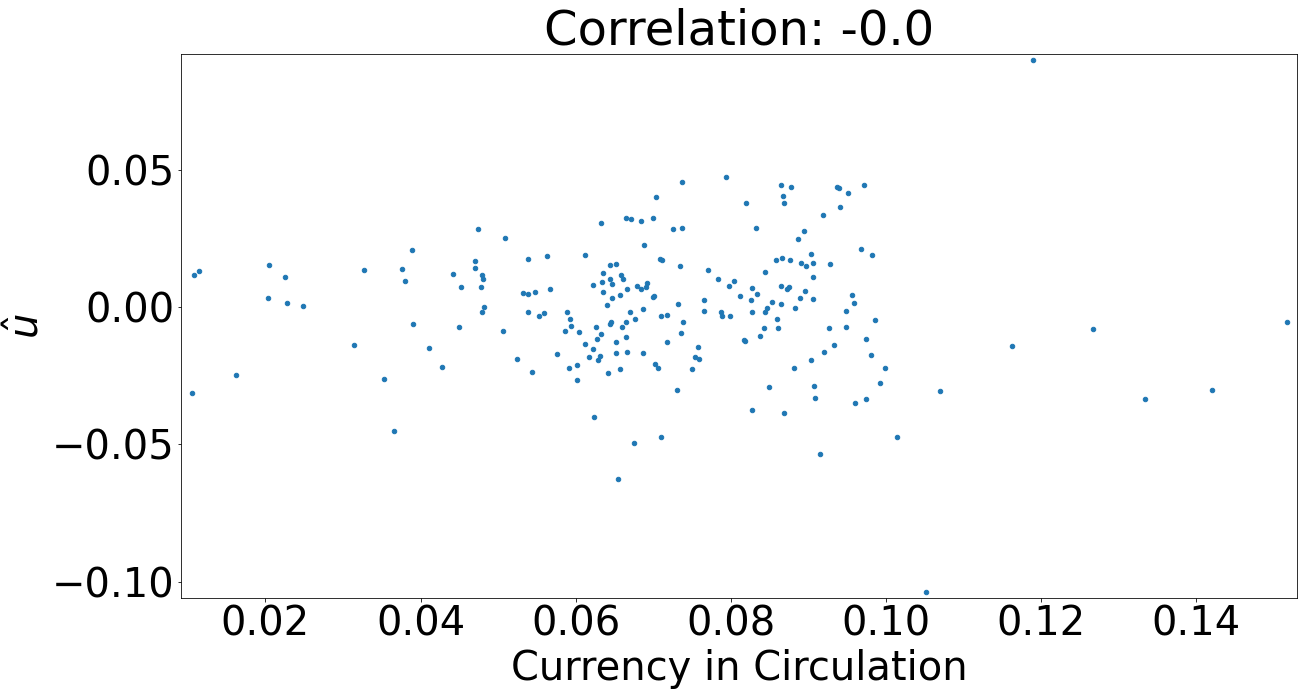

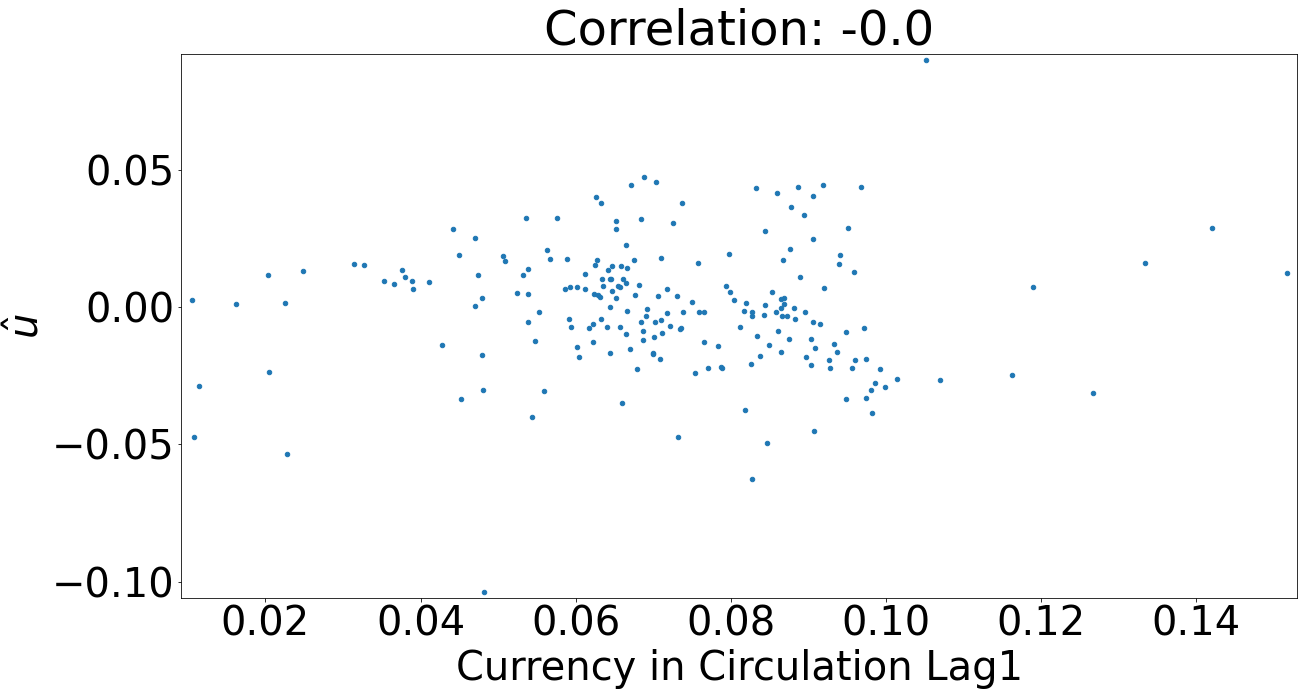

In [20]:
from supplementaryFunctions import *
build_estimator(data, results, y_name[0])
plot_errors(data)